<a href="https://colab.research.google.com/github/NikolaJenkins/MNIST-Numbers/blob/main/mnist_all_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.8 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
matplotlib.rc('image', cmap='Greys')
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
train = (path/'training').ls().sorted()
test = (path/'testing').ls().sorted()

In [3]:
train_tensors = {}
for path in train:
  train_tensors[path.name] = [tensor(Image.open(o)) for o in path.ls()]
len(train_tensors['3']), len(train_tensors['5'])

(6131, 5421)

In [4]:
#hide_output
df = pd.DataFrame(train_tensors['5'][5420])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,29,29,13,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,179,252,252,252,207,169,169,44,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,76,0,19,123,246,253,252,252,252,253,252,252,190,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,126,249,226,231,252,252,241,139,139,139,78,28,28,15,0,0
9,0,0,0,0,0,0,0,0,0,0,0,70,253,253,255,247,225,125,51,0,0,0,0,0,0,0,0,0


In [5]:
stacked_tensors = {}
for t in train_tensors:
  stacked_tensors[t] = torch.stack(train_tensors[t]).float()/255

stacked_tensors['3'].shape, len(stacked_tensors['3'].shape), stacked_tensors['5'].shape, len(stacked_tensors['3'].shape) == len(stacked_tensors['5'].shape)

(torch.Size([6131, 28, 28]), 3, torch.Size([5421, 28, 28]), True)

<Axes: >

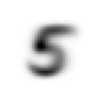

In [6]:
means = {}
for s in stacked_tensors:
  means[s] = stacked_tensors[s].mean(0)
show_image(means['5'])

<Axes: >

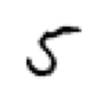

In [7]:
a_5 = stacked_tensors['5'][5420]
show_image(a_5)

In [8]:
dist_5_abs = (a_5 - means['5']).abs().mean()
dist_5_sqr = ((a_5 - means['5'])**2).mean().sqrt()
dist_5_abs,dist_5_sqr

(tensor(0.1204), tensor(0.2137))

In [9]:
F.l1_loss(a_5.float(),means['5']), F.mse_loss(a_5,means['5']).sqrt()

(tensor(0.1204), tensor(0.2137))

In [10]:
test_tensors = {}
for path in test:
  test_tensors[path.name] = torch.stack([tensor(Image.open(o)) for o in path.ls()])
  test_tensors[path.name] = test_tensors[path.name].float()/255

In [11]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_5, means['5'])

tensor(0.1204)

In [12]:
testing_5_dist = mnist_distance(test_tensors['5'], means['5'])
testing_5_dist, testing_5_dist.shape

(tensor([0.1372, 0.1305, 0.1266, 0.1547, 0.1357, 0.1559, 0.1465, 0.1539, 0.1524, 0.1457, 0.1302, 0.1531, 0.1453, 0.1182, 0.1443, 0.1372, 0.1184, 0.1272, 0.1306, 0.1177, 0.1320, 0.1277, 0.1495, 0.1191,
         0.1313, 0.1418, 0.1345, 0.1171, 0.1201, 0.1683, 0.1621, 0.1223, 0.1636, 0.1142, 0.1603, 0.1331, 0.1277, 0.1189, 0.1204, 0.1314, 0.1464, 0.1286, 0.1283, 0.1973, 0.1601, 0.1743, 0.1254, 0.1358,
         0.1245, 0.1338, 0.1491, 0.1649, 0.1455, 0.1333, 0.1304, 0.1858, 0.1282, 0.1399, 0.1104, 0.1538, 0.1220, 0.1457, 0.1390, 0.1148, 0.1545, 0.1312, 0.1257, 0.1481, 0.1439, 0.1252, 0.1409, 0.1232,
         0.1168, 0.1433, 0.1379, 0.1422, 0.1383, 0.1271, 0.1355, 0.1140, 0.1329, 0.1303, 0.1508, 0.1377, 0.1503, 0.1369, 0.1530, 0.1318, 0.1249, 0.1270, 0.1183, 0.1328, 0.1401, 0.1444, 0.1223, 0.1353,
         0.1210, 0.1341, 0.1123, 0.1340, 0.1435, 0.1707, 0.1314, 0.1594, 0.1753, 0.1603, 0.1571, 0.1314, 0.1492, 0.1309, 0.1476, 0.1371, 0.1519, 0.1377, 0.1523, 0.1378, 0.1223, 0.1352, 0.1695, 0.1

In [13]:
def is_3(x): return mnist_distance(x, means['3']) < mnist_distance(x, means['5'])

In [14]:
def determine_number(val):
  err = torch.stack([(mnist_distance(val, means[str(m)])) for m in range(10)], dim = 1)
  err = torch.argmin(err, dim = 1)
  return err

In [15]:
is_3(test_tensors['3'][5]), is_3(test_tensors['3'][5]).float()

(tensor(True), tensor(1.))

In [16]:
import builtins

In [17]:
acc = {}
for k, test_tensor in test_tensors.items():
  preds = determine_number(test_tensor)
  total_sum = builtins.sum(pred.item() == int(k) for pred in preds)
  acc[k] = total_sum / len(preds)
builtins.sum(acc.values()) / len(acc)

0.6610330933054313

In [20]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [68]:
train_x = torch.cat([s for s in stacked_tensors.values()]).view(-1, 28*28)
train_y = [[int(n)] * len(tensor) for n, tensor in train_tensors.items()]
train_y = torch.cat([tensor(l) for l in train_y]).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [73]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [75]:
test_x = torch.cat([test_tensor for test_tensor in test_tensors.values()]).view(-1, 28*28)
test_x = [[int(n)] * len(tensor) for n, tensor in test_tensors.items()]
test_y = torch.cat([tensor(l) for l in train_y]).unsqueeze(1)
test_dset = list(zip(test_x,test_y))

In [76]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [87]:
weights = init_params((28*28,10))
bias = init_params(10)

In [88]:
(train_x[0]*weights.T).sum() + bias

tensor([47.7761, 46.2360, 48.2167, 48.3564, 46.9065, 47.7337, 48.9209, 48.9993, 49.5745, 48.2303], grad_fn=<AddBackward0>)

In [89]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ 13.8304,  14.3102,  -1.7790,  ..., -26.3039,  13.2142,  27.3960],
        [ 11.6721,  -0.9881,  14.8505,  ..., -17.4019,  -0.8964,  16.8875],
        [  7.7743,   2.2867,  -2.9371,  ..., -24.1415,   9.8838,  14.0946],
        ...,
        [  6.0142,  -2.0647,  -5.6052,  ..., -10.9471,  -5.3453,  13.3555],
        [  6.8073,   9.9803,  -1.1557,  ...,  -5.0970,   1.3961,   8.6760],
        [  4.0013,  15.5241,  -2.1219,  ...,  -6.4946,  -5.1504,  14.5047]], grad_fn=<AddBackward0>)

In [90]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False, False,  True,  ...,  True, False, False],
        [False,  True, False,  ...,  True,  True, False],
        [False, False,  True,  ...,  True, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [ ]:
corrects.float().mean().item()

0.4912068545818329

In [ ]:
with torch.no_grad(): weights[0] *= 1.0001

In [ ]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [ ]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [ ]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [ ]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

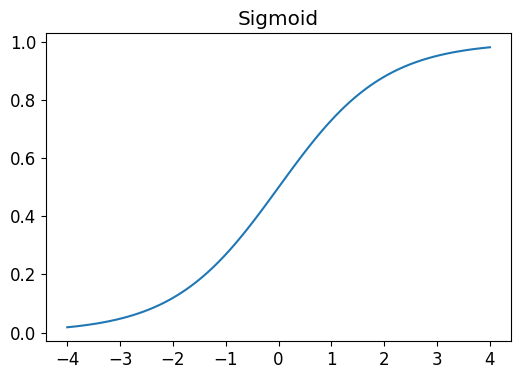

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [ ]:
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0182), tensor([-0.1260]))

In [ ]:
weights.grad.zero_()
bias.grad.zero_();

In [ ]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [ ]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [ ]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [ ]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.5261

In [ ]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.9183

In [ ]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9276 0.9398 0.9466 0.9505 0.9525 0.9559 0.9579 0.9598 0.9608 0.9613 0.9618 0.9633 0.9637 0.9647 0.9657 0.9672 0.9677 0.9667 0.9672 0.9677 

In [ ]:
linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.4186

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.4932 0.7798 0.8516 0.9165 0.9336 0.9487 0.956 0.9634 0.9658 0.9673 0.9692 0.9721 0.9736 0.9741 0.9761 0.9761 0.9775 0.9775 0.978 0.9785 

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.7983 0.8535 0.917 0.9355 0.9492 0.958 0.9643 0.9663 0.9673 0.9707 0.9726 0.9736 0.9751 0.9756 0.9765 0.9775 0.9775 0.978 0.9785 

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636508,0.503531,0.495584,00:00
1,0.533227,0.187808,0.842002,00:00
2,0.195589,0.183700,0.833170,00:00
3,0.085569,0.107622,0.911187,00:00
4,0.045021,0.078366,0.933759,00:00
5,0.029193,0.062697,0.946516,00:00
6,0.022696,0.052944,0.955348,00:00
7,0.019819,0.046463,0.961727,00:00
8,0.018365,0.041913,0.965653,00:00
9,0.017493,0.038563,0.966634,00:00


In [ ]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

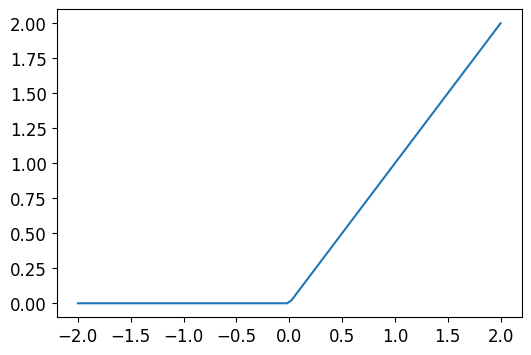

In [ ]:
plot_function(F.relu)

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
#hide_output
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.319728,0.406920,0.505397,00:00
1,0.148601,0.235673,0.798332,00:00
2,0.082089,0.117067,0.915604,00:00
3,0.053686,0.078488,0.938665,00:00
4,0.040527,0.061038,0.955348,00:00
5,0.033825,0.051260,0.964181,00:00
6,0.029992,0.045093,0.966143,00:00
7,0.027511,0.040880,0.968106,00:00
8,0.025728,0.037834,0.969578,00:00
9,0.024352,0.035526,0.972522,00:00


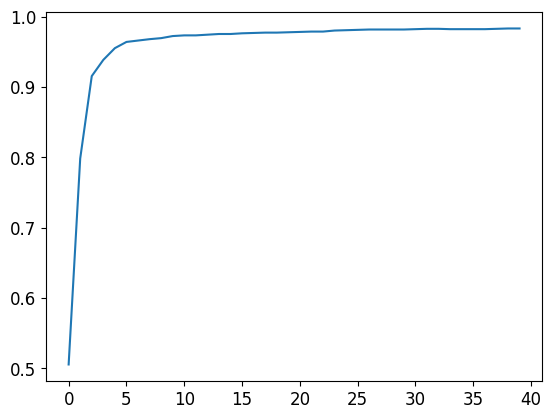

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [ ]:
learn.recorder.values[-1][2]

0.983316957950592

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.126196,0.017546,0.995093,04:20


In [153]:
try:
    # Check if 'sum' is defined in the current global scope
    if 'sum' in globals():
        print(f"Variable 'sum' found in globals.")
        print(f"Type of 'sum': {type(sum)}")
        print(f"Value of 'sum': {sum}")
    else:
        print("Variable 'sum' not found in globals.")
except Exception as e:
    print(f"An error occurred while checking for 'sum': {e}")

# You can also check the built-in sum function for comparison
print(f"Type of built-in sum: {type(builtins.sum)}")

Variable 'sum' found in globals.
Type of 'sum': <class 'int'>
Value of 'sum': 291
Type of built-in sum: <class 'builtin_function_or_method'>
